<a href="https://colab.research.google.com/github/SARU230/Python-codes-for-gromacs/blob/main/local_stress_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

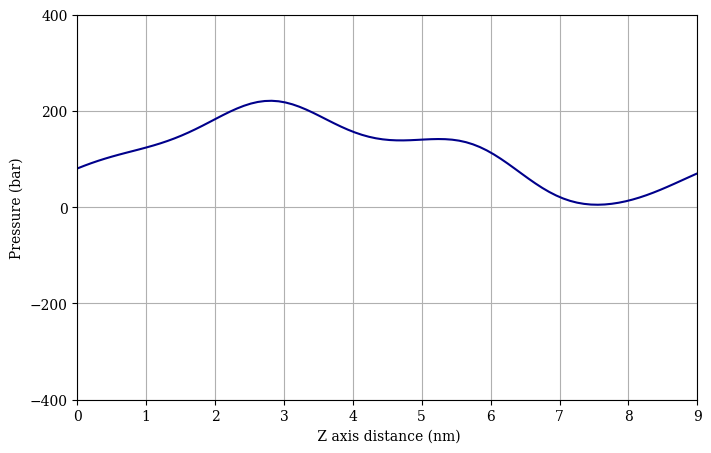

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
def compute_pressure_from_gromacs(stress_file):
    """
    Compute internal pressure from GROMACS stress tensor output.
    Parameters:
    - stress_file: Path to GROMACS .xvg file containing stress tensor components
    Returns:
    - time_steps: List of time steps
    - pressure_values: Internal pressure (bar)
    """
    data = []
    with open(stress_file, 'r') as file:
        for line in file:
            if not line.startswith(("#", "@")):  # Skip GROMACS headers
                data.append([float(i) for i in line.split()])
    data = np.array(data)
    time_steps = data[:, 0]  # First column is distance
    stress_xx = data[:, 1]   # Replace with correct column indices for stress
    stress_xy = data[:, 2]
    stress_xz = data[:, 3]
    stress_yx = data[:, 4]
    stress_yy = data[:, 5]
    stress_yz = data[:, 6]
    stress_zx = data[:, 7]
    stress_zy = data[:, 8]
    stress_zz = data[:, 9]

    pressure_values = -(stress_xx + stress_yy + stress_zz) / 3  # Units: bar
    return time_steps, pressure_values
#stress_file = "stress0ns.txt"  # GROMACS output file
#stress_file = "stress10ns.txt"  # GROMACS output file
#stress_file = "stress100ns.txt"
stress_file = "stress200ns.txt"

time_steps, pressure_values = compute_pressure_from_gromacs(stress_file)
# Plot Pressure vs. Time
plt.figure(figsize=(8, 5))
plt.plot(time_steps, pressure_values, label="Internal Pressure (bar)", color="darkblue")
plt.xlabel(" Z axis distance (nm)")
plt.ylabel("Pressure (bar)")
plt.xlim (0, 9)
plt.ylim (-400, 400)

# Set major axis spacing
major_spacing_x = 1.0  # Set major tick spacing for x-axis (e.g., 1.0 nm)
major_spacing_y = 200  # Set major tick spacing for y-axis (e.g., 1000 bar)

ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(major_spacing_x))  # Set x-axis spacing
ax.yaxis.set_major_locator(ticker.MultipleLocator(major_spacing_y))  # Set y-axis spacing

#plt.title("Internal Pressure from GROMACS Stress Tensor")
#plt.legend()
plt.grid()
plt.show()

<ipython-input-37-86876a951c38>:80: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(plot_style['show_grid'],


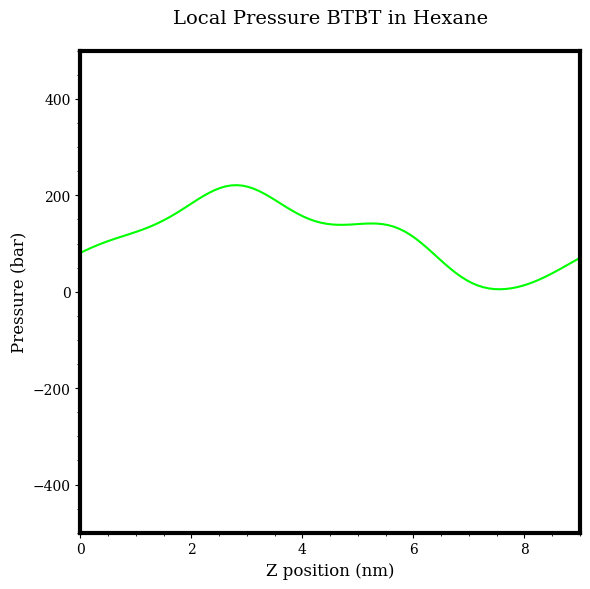

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams

# ======================
# 1. FONT CONFIGURATION
# ======================
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif']
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Times New Roman'
rcParams['mathtext.it'] = 'Times New Roman:italic'

# ======================
# 2. DATA PROCESSING
# ======================
def compute_pressure_from_gromacs(stress_file):
    """Parse GROMACS stress file and compute pressure"""
    data = []
    with open(stress_file, 'r') as f:
        for line in f:
            if not line.startswith(("#", "@")):
                data.append([float(i) for i in line.split()])
    data = np.array(data)
    return data[:, 0], -(data[:,1] + data[:,5] + data[:,9]) / 3

# ======================
# 3. USER PARAMETERS
# ======================
#input_file = "stress0ns.txt"
input_file = "stress200ns.txt"
output_file = "pressure_profile.xvg"

# Axis Limits
x_limits = (0, 9)    # (min, max) for Z-axis (nm)
y_limits = (-500, 500) # (min, max) for Pressure (bar)

# Tick Customization
x_major_ticks = 2.0    # Spacing for major X-ticks (nm)
x_minor_ticks = 0.5     # Spacing for minor X-ticks (nm)
y_major_ticks = 200     # Spacing for major Y-ticks (bar)
y_minor_ticks = 50      # Spacing for minor Y-ticks (bar)

# Style Parameters
plot_style = {
    'linewidth': 1.5,
    'frame_width': 3.0,
    'show_grid': False,
    'grid_style': '',
    'grid_alpha': 0.4
}

# ======================
# 4. MAIN VISUALIZATION
# ======================
z, pressure = compute_pressure_from_gromacs(input_file)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(z, pressure, color='lime', linewidth=plot_style['linewidth'])

# Apply axis limits
ax.set_xlim(x_limits)
ax.set_ylim(y_limits)

# Configure ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(x_major_ticks))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(x_minor_ticks))
ax.yaxis.set_major_locator(ticker.MultipleLocator(y_major_ticks))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(y_minor_ticks))

# Styling
ax.set_xlabel("Z position (nm)", fontsize=12)
ax.set_ylabel("Pressure (bar)", fontsize=12)
ax.set_title("Local Pressure BTBT in Hexane", fontsize=14, pad=20)

for spine in ax.spines.values():
    spine.set_linewidth(plot_style['frame_width'])

ax.grid(plot_style['show_grid'],
        linestyle=plot_style['grid_style'],
        alpha=plot_style['grid_alpha'])

plt.tight_layout()
plt.savefig("pressure_profile.png", dpi=300)
plt.show()

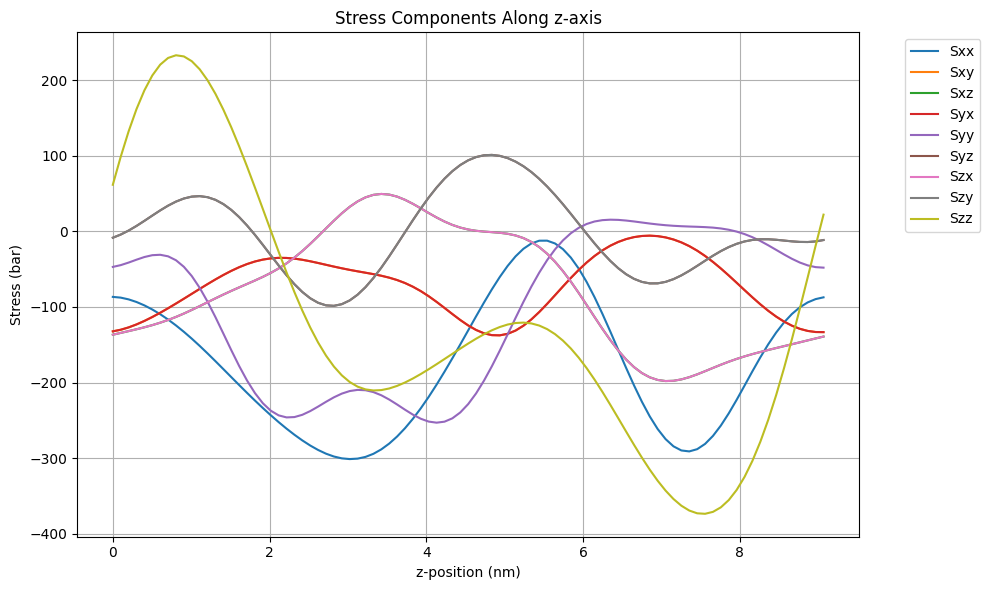

In [ ]:
# Heatmap of stress components vs position
plt.figure(figsize=(10, 6))
components = ['Sxx', 'Sxy', 'Sxz', 'Syx', 'Syy', 'Syz', 'Szx', 'Szy', 'Szz']
for i in range(9):
    plt.plot(z_positions, stress_tensors[:,i], label=components[i])

plt.xlabel('z-position (nm)')
plt.ylabel('Stress (bar)')
plt.title('Stress Components Along z-axis')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()